# K-Means Clustering

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

### Criando dados 

In [13]:
from sklearn.datasets import make_blobs

In [18]:
X, y = make_blobs(n_samples=200, n_features=2,
                 centers=4, cluster_std=1.8, random_state=42)

data[0]: X : array of shape [n_samples, n_features]
    The generated samples.

data[1]: y : array of shape [n_samples]
    The integer labels for cluster membership of each sample.

### Visualizando os dados criados

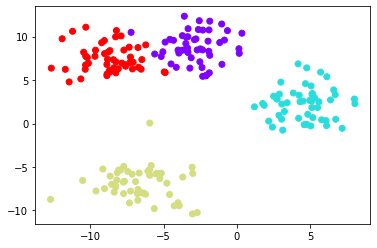

In [26]:
plt.scatter(X[:,0], X[:,1], c=y,
           cmap='rainbow')

### Criando os clusters com k K=4

In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters=4)

In [24]:
kmeans.fit(X)

KMeans(n_clusters=4)

In [28]:
y_predict = kmeans.labels_

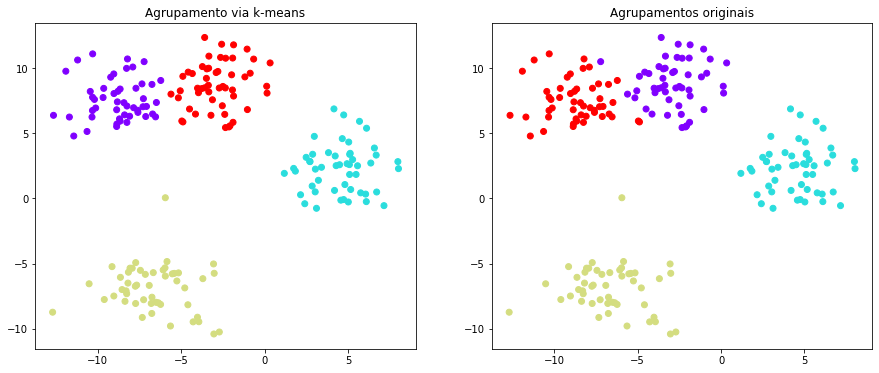

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.set_title('Agrupamento via k-means')
ax1.scatter(X[:,0], X[:,1], c=y_predict,
           cmap='rainbow')
ax2.set_title('Agrupamentos originais')
ax2.scatter(X[:,0], X[:,1], c=y,
           cmap='rainbow')

### Visualizando o método Elbow para escolha de K em K-means

In [39]:
distortions = []
inertias = []
mappings1 = {}
mappings2 = {}
K = range(1, 10)

In [40]:
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_), axis=1))/X.shape[0])
    inertias.append(kmeans.inertia_)
    mappings1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_), axis=1))/X.shape[0]
    mappings2[k] = kmeans.inertia_

Text(0.5, 1.0, 'Método Elbow para escolha de K')

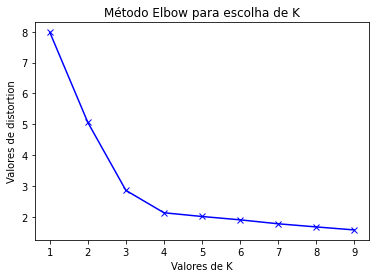

In [41]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Valores de distortion')
plt.title('Método Elbow para escolha de K')